In [3]:
import torch
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained('CompVis/stable-diffusion-v1-4',
                                               variant='fp16',
                                               torch_dtype=torch.float16,
                                               use_auth_token=True).to('cuda')
image = pipe('An astronaught scuba diving')
image

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

StableDiffusionPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=512x512 at 0x7FE180F47F40>], nsfw_content_detected=[False])

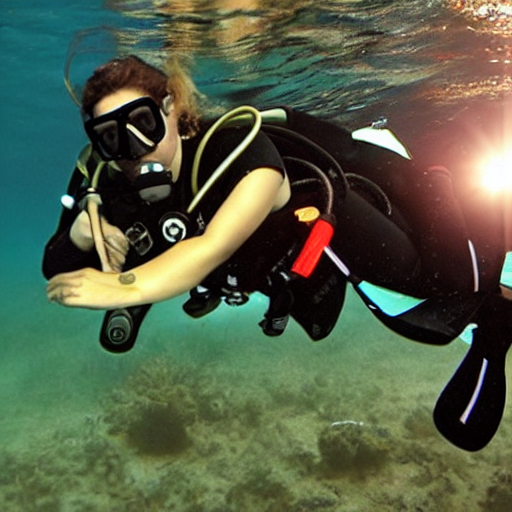

In [10]:
image[0][0]

# Using Stable Diffusion

In [16]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from diffusers import StableDiffusionPipeline
from fastcore.all import concat
from huggingface_hub import notebook_login
from PIL import Image

logging.disable(logging.WARNING)

torch.manual_seed(1)
if not(Path.home()/'.cache/huggingface'/'token').exists(): 
    notebook_login()

In [17]:
pipe = StableDiffusionPipeline.from_pretrained('CompVis/stable-diffusion-v1-4',
                                               variant='fp16',
                                               torch_dtype=torch.float16,
                                               use_auth_token=True).to('cuda')

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [19]:
!ls ~/.cache/huggingface/hub

models--CompVis--stable-diffusion-v1-4	version_diffusers_cache.txt
version.txt


In [23]:
!cat ~/.cache/huggingface/hub/version.txt

1

  0%|          | 0/50 [00:00<?, ?it/s]

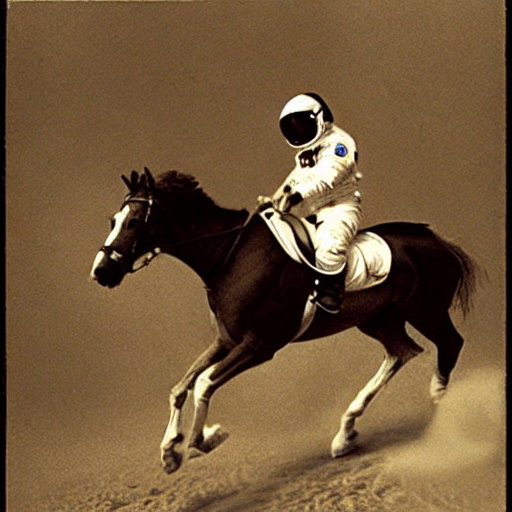

In [25]:
prompt = "a photograph of an astronaut riding a horse"
pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

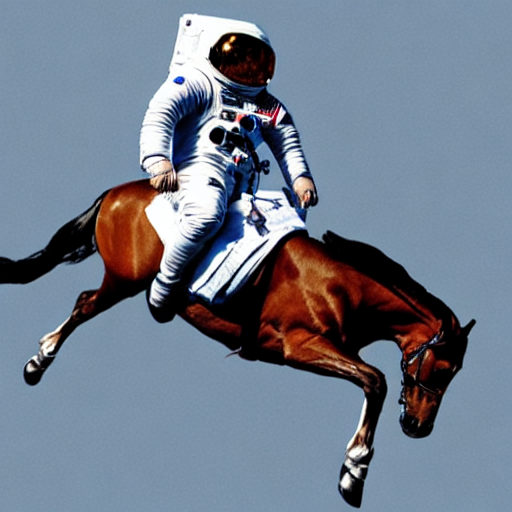

In [26]:
torch.manual_seed(1024)
pipe(prompt).images[0]

Setting steps to 3 which shows initial state of image 

  0%|          | 0/3 [00:00<?, ?it/s]

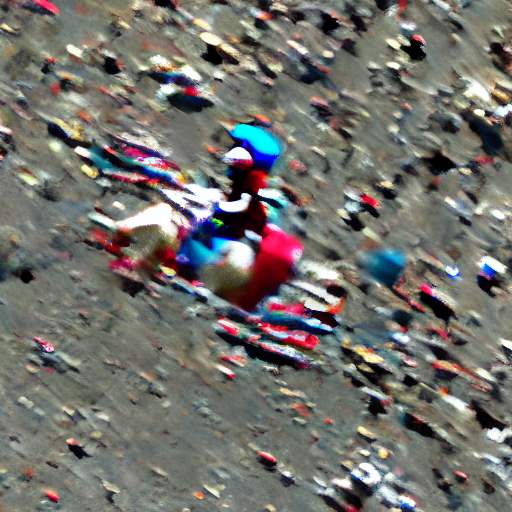

In [28]:
torch.manual_seed(1024)
pipe(prompt, num_inference_steps=3).images[0]

  0%|          | 0/16 [00:00<?, ?it/s]

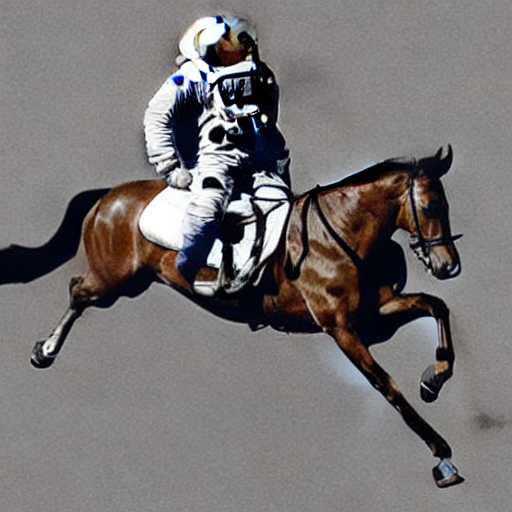

In [31]:
# Looks somewhat similar to the first image with higher steps
torch.manual_seed(1024)   # why do we have to redefine seed in each cell?
pipe(prompt, num_inference_steps=16).images[0]

## 1.1.2 Guidannce Scale
